# Global Music Streaming Listener Preferences 🎵

Analyzing Spotify top tracks to explore patterns in audio features, artist popularity, and song characteristics.  

In [165]:
# import libraries needed to work with it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = './data/Global_Music_Streaming_Listener_Preferences.csv'
df = pd.read_csv(file_path)

#check the overview of this dataset
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


In [166]:
# check the structure and datatype of the dataset
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,36.664000,309.237200,253.51720,50.296464,42.391060
std,13.763844,172.029822,146.36928,23.171936,21.444121
min,13.000000,10.000000,1.00000,10.020000,5.000000
25%,25.000000,161.000000,126.00000,30.147500,24.195000
50%,37.000000,316.000000,254.00000,50.420000,41.960000
75%,49.000000,457.250000,382.00000,70.337500,60.740000
max,60.000000,600.000000,500.00000,89.990000,79.990000


In [167]:
# Check for missing values
df.isnull().sum()

User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64

In [168]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [169]:
# Confirm cleanup
df_cleaned.isnull().sum()

User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64

In [170]:
# Rename columns (if they are long or inconsistent)

df_cleaned.columns = [col.strip().replace(' ', '_').lower() for col in df_cleaned.columns]
df_cleaned.head()
df_cleaned.to_csv('data/cleaned_global_music_streaming_preferences.csv', index=False)

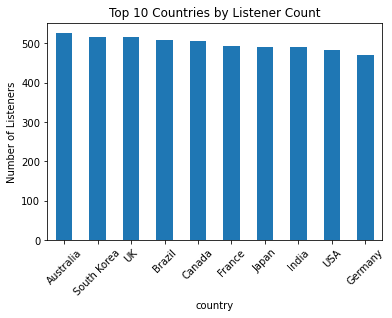

In [171]:
 # Top Countries by Listener Count

df_cleaned['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Listener Count')
plt.ylabel('Number of Listeners')
plt.xlabel('country')
plt.xticks(rotation=45)
plt.show()

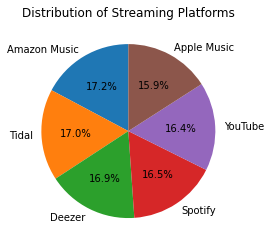

In [172]:
# Distribution of Streaming Platforms

df_cleaned['streaming_platform'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Streaming Platforms')
plt.ylabel('')
plt.show()


In [173]:
# Find the most played artist overall
most_played_artist = df_cleaned['most_played_artist'].value_counts().idxmax()
most_played_artist_count = df_cleaned['most_played_artist'].value_counts().max()

print(f"The most played artist overall is {most_played_artist} with {most_played_artist_count} users having them as their top artist.")


The most played artist overall is Bad Bunny with 528 users having them as their top artist.


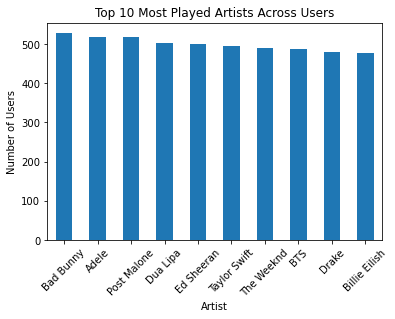

In [174]:
# Visualize this result using Matplotlib

top_artists = df_cleaned['most_played_artist'].value_counts().head(10)
top_artists.plot(kind='bar')
plt.title('Top 10 Most Played Artists Across Users')
plt.xlabel('Artist')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [175]:
# Calculate total minutes streamed per platform
platform_minutes = df_cleaned.groupby('streaming_platform')['minutes_streamed_per_day'].sum().sort_values(ascending=False)

# Display the results
print(platform_minutes)

streaming_platform
Tidal           267659
YouTube         263144
Amazon Music    262685
Deezer          259301
Spotify         247127
Apple Music     246270
Name: minutes_streamed_per_day, dtype: int64


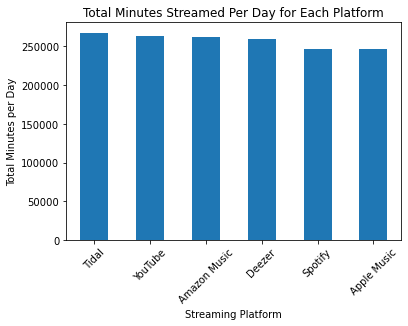

In [176]:
import matplotlib.pyplot as plt

platform_minutes.plot(kind='bar')
plt.title('Total Minutes Streamed Per Day for Each Platform')
plt.ylabel('Total Minutes per Day')
plt.xlabel('Streaming Platform')
plt.xticks(rotation=45)
plt.show()

In [177]:
# Add a new column for repetition rate (approximate play count per liked song per day)
df_cleaned['repeat_song_rate_(%)'] = df_cleaned['minutes_streamed_per_day'] / df_cleaned['number_of_songs_liked']

In [178]:
# Find the highest repetition rate
max_repeat_rate = df_cleaned['repeat_song_rate_(%)'].max()

# Find user(s) with this highest repetition rate
most_repeated = df_cleaned[df_cleaned['repeat_song_rate_(%)'] == max_repeat_rate]

print(f"The highest repetition rate is {max_repeat_rate:.2f} minutes per liked song per day.")
most_repeated

The highest repetition rate is 522.00 minutes per liked song per day.


,user_id,age,country,streaming_platform,top_genre,minutes_streamed_per_day,number_of_songs_liked,most_played_artist,subscription_type,listening_time_(morning/afternoon/night),discover_weekly_engagement_(%),repeat_song_rate_(%)
4342,U5342,51,UK,Tidal,Hip-Hop,522,1,Ed Sheeran,Premium,Afternoon,55.14,522.0


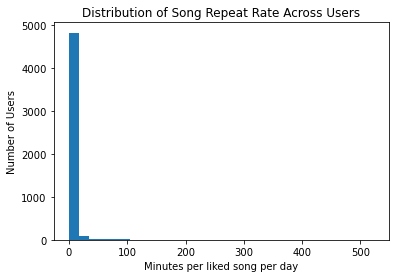

In [179]:
import matplotlib.pyplot as plt

plt.hist(df_cleaned['repeat_song_rate_(%)'], bins=30)
plt.title('Distribution of Song Repeat Rate Across Users')
plt.xlabel('Minutes per liked song per day')
plt.ylabel('Number of Users')
plt.show()

In [180]:
# Average repetition rate % per platform 
repeat_rate_by_platform = df_cleaned.groupby('streaming_platform')['repeat_song_rate_(%)'].mean().sort_values(ascending=False)
print(repeat_rate_by_platform)

streaming_platform
Tidal           4.796654
Spotify         4.684093
Deezer          4.679480
Apple Music     4.547501
Amazon Music    3.370040
YouTube         3.298002
Name: repeat_song_rate_(%), dtype: float64
